In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Gridworld definition
START = np.array([3,0])
END = np.array([3,7])
TOP = 0
BOTTOM = 6
MAX_RIGHT = 9
MAX_LEFT = 0
WIND_2 = [6,7]
WIND_1 = [3,4,5,8]

In [3]:
# Regular actions
ACTIONS = [
    np.array([0,1]), #RIGHT
    np.array([0,-1]), #LEFT
    np.array([-1,0]), #UP
    np.array([1,0]) #DOWN
]

In [4]:
class SarsaAgent:
    def __init__(self, epsilon=0.1, alpha=0.5):
        self.epsilon = epsilon
        self.Q = np.zeros([BOTTOM + 1, MAX_RIGHT + 1, len(ACTIONS)])
        self.alpha = alpha
        
    def reset(self):
        self.position = START
        self.r = 0
        
    def e_greedy(self, state):
        if np.random.random() >= self.epsilon:
            action = np.argmax(self.Q[state[0], state[1]])
        else:
            action = np.random.choice(len(ACTIONS))
        return action
    
    def move(self, action):
        new_position = self.position + action
        if self.position[1] in WIND_2:
            new_position[0] -= 2
        elif self.position[1] in WIND_1:
            new_position[0] -= 1
        new_position[0] = max(min(BOTTOM, new_position[0]), TOP)
        new_position[1] = max(min(MAX_RIGHT, new_position[1]), MAX_LEFT)
        self.position = new_position
        
    
    def generate_episode(self, verbose=False):
        self.reset()
        not_done = True
        # Intiialize S
        s1 = self.position
        # Choose A
        action1 = self.e_greedy(s1)
        pos = []
        while not_done:
            if verbose:
                print("Position", self.position)
                print("Action taken ", ACTIONS[action1])
                pos.append(self.position)
            # Take action A
            self.move(ACTIONS[action1])
            if np.any(self.position != END):
                # observe R, S'
                s2 = self.position
                reward = -1
                self.r += reward
                action2 = self.e_greedy(s2)
                self.Q[s1[0], s1[1], action1] += self.alpha * (reward + self.Q[s2[0], s2[1], action2] - self.Q[s1[0], s1[1], action1])
                s1 = s2
                action1 = action2
            else:
                not_done = False
                return pos

In [5]:
class QAgent:
    def __init__(self, epsilon=0.1, alpha=0.5):
        self.epsilon = epsilon
        self.Q = np.zeros([BOTTOM + 1, MAX_RIGHT + 1, len(ACTIONS)])
        self.alpha = alpha
        
    def reset(self):
        self.position = START
        self.r = 0
        
    def e_greedy(self, state):
        if np.random.random() >= self.epsilon:
            action = np.argmax(self.Q[state[0], state[1]])
        else:
            action = np.random.choice(len(ACTIONS))
        return action
    
    def move(self, action):
        new_position = self.position + action
        if self.position[1] in WIND_2:
            new_position[0] -= 2
        elif self.position[1] in WIND_1:
            new_position[0] -= 1
        new_position[0] = max(min(BOTTOM, new_position[0]), TOP)
        new_position[1] = max(min(MAX_RIGHT, new_position[1]), MAX_LEFT)
        self.position = new_position
        
    
    def generate_episode(self, verbose=False, greedy=False):
        self.reset()
        not_done = True
        # Intiialize S
        s1 = self.position
        pos = []
        pos.append(s1)
        while not_done:
            if greedy:
                action = np.argmax(self.Q[s1[0], s1[1]])
                self.move(ACTIONS[action])
                if np.any(self.position != END):
                    s1 = self.position
                    reward = -1
                    self.r += reward
                else:
                    not_done = False
                    return pos
            else: # during training
                # Choose A
                action1 = self.e_greedy(s1)
                # Take action A
                self.move(ACTIONS[action1])
                if np.any(self.position != END):
                    # observe R, S'
                    s2 = self.position
                    reward = -1
                    self.r += reward
                    self.Q[s1[0], s1[1], action1] += self.alpha * (reward + np.max(self.Q[s2[0],s2[1]]) - self.Q[s1[0], s1[1], action1])
                    s1 = s2
                else:
                    not_done = False
                    return pos
            if verbose:
                print("Position", self.position)
                print("Action taken ", ACTIONS[action])
                pos.append(self.position)
            

In [6]:
sarsa = SarsaAgent()

In [7]:
q = QAgent()

In [8]:
for i in range(10000):
    sarsa.generate_episode(verbose=False)
    q.generate_episode(verbose=False)

In [9]:
sarsa_pos = sarsa.generate_episode(True)

Position [3 0]
Action taken  [ 0 -1]
Position [3 0]
Action taken  [-1  0]
Position [2 0]
Action taken  [0 1]
Position [2 1]
Action taken  [0 1]
Position [2 2]
Action taken  [0 1]
Position [2 3]
Action taken  [0 1]
Position [1 4]
Action taken  [0 1]
Position [0 5]
Action taken  [0 1]
Position [0 6]
Action taken  [ 0 -1]
Position [0 5]
Action taken  [-1  0]
Position [0 5]
Action taken  [0 1]
Position [0 6]
Action taken  [0 1]
Position [0 7]
Action taken  [1 0]
Position [0 7]
Action taken  [0 1]
Position [0 8]
Action taken  [0 1]
Position [0 9]
Action taken  [1 0]
Position [1 9]
Action taken  [1 0]
Position [2 9]
Action taken  [1 0]
Position [3 9]
Action taken  [1 0]
Position [4 9]
Action taken  [ 0 -1]
Position [4 8]
Action taken  [ 0 -1]


In [10]:
q_pos = q.generate_episode(verbose=True, greedy=True)

Position [3 1]
Action taken  [0 1]
Position [3 2]
Action taken  [0 1]
Position [3 3]
Action taken  [0 1]
Position [2 4]
Action taken  [0 1]
Position [1 5]
Action taken  [0 1]
Position [0 6]
Action taken  [0 1]
Position [0 7]
Action taken  [0 1]
Position [0 8]
Action taken  [0 1]
Position [0 9]
Action taken  [0 1]
Position [1 9]
Action taken  [1 0]
Position [2 9]
Action taken  [1 0]
Position [3 9]
Action taken  [1 0]
Position [4 9]
Action taken  [1 0]
Position [4 8]
Action taken  [ 0 -1]


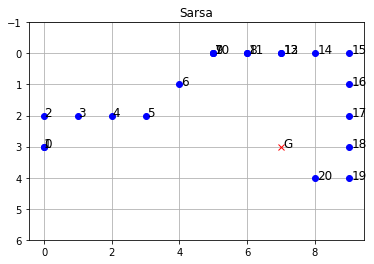

In [11]:
plt.figure()
plt.ylim((-1,6))
plt.gca().invert_yaxis()
plt.title("Sarsa")
plt.grid()
plt.plot(7,3, 'rx')
plt.text(7 * (1 + 0.01), 3 * (1 + 0.01) , "G", fontsize=12)
for i, s in enumerate(sarsa_pos):
    x = s[1]
    y = s[0]
    plt.plot(x, y, 'bo')
    plt.text(x * (1 + 0.01), y * (1 + 0.01) , i, fontsize=12)

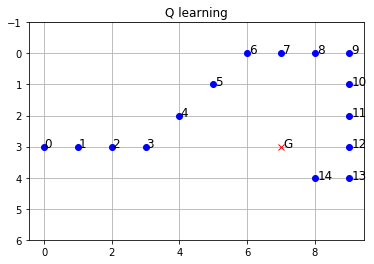

In [12]:
plt.figure()
plt.ylim((-1,6))
plt.gca().invert_yaxis()
plt.title("Q learning")
plt.grid()
plt.plot(7,3, 'rx')
plt.text(7 * (1 + 0.01), 3 * (1 + 0.01) , "G", fontsize=12)
for i, s in enumerate(q_pos):
    x = s[1]
    y = s[0]
    plt.plot(x, y, 'bo')
    plt.text(x * (1 + 0.01), y * (1 + 0.01) , i, fontsize=12)